# Vibração Livre de um Sistema de Um Grau de Liberdade

Professor Paulo Victor

---
**Atenção:**

Este material serve apenas como um guia para estudos e para as aulas, não substituindo a leitura dos livros indicados e é de uso exclusivo dos alunos do CEFET/RJ campus Angra dos Reis.

---

## Sistema Massa-Mola

In [1]:
from IPython.display import Image

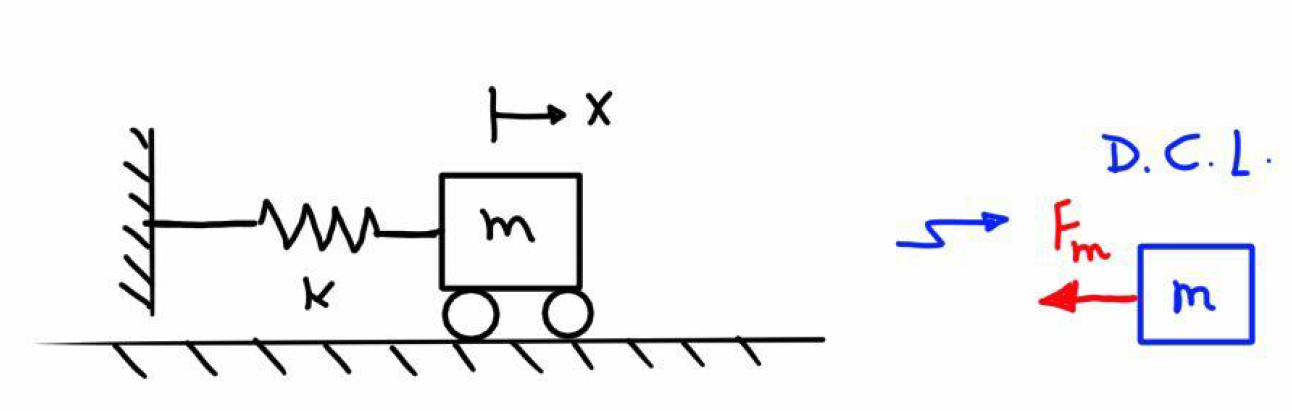

In [2]:
Image('figuras/fig2-1.png',width=600)

$F_m = -k x$

$F_m = m a$

$-k x = m \ddot{x}$

**Equação Diferencial de Movimento:**

$m \ddot{x} + k x = 0 $

$C.I. \rightarrow \left\{ \begin{array} x(0) = x_0 \\ \dot{x}(0) = v_0 \end{array} \right.$


Resolvendo esta EDO...

In [3]:
from sympy import *

In [4]:
t = symbols('t')
m,k = symbols('m k',positive = True)
x0,v0 = symbols('x0 v0')
x = Function('x')(t)

In [5]:
EDM = Eq(m*x.diff(t,2) + k*x,0)
EDM

Eq(k*x(t) + m*Derivative(x(t), (t, 2)), 0)

In [6]:
x0,v0 = symbols('x0 v0')

In [7]:
sol = dsolve(EDM)
sol

Eq(x(t), C1*sin(sqrt(k)*t/sqrt(m)) + C2*cos(sqrt(k)*t/sqrt(m)))

**Define-se:**

$\omega_n = \sqrt{\dfrac{k}{m}}$

Onde $\omega_n$ é chamado de **pulsação natural** ou **frequência circular natural não amortecida**.

In [8]:
omega_n = symbols('omega_n')
sol = sol.subs(sqrt(k/m),omega_n)
sol

Eq(x(t), C1*sin(omega_n*t) + C2*cos(omega_n*t))

Para encontrarmos os valores de $C_1$ e $C_2$ usaremos as **condições iniciais**:

$x(0) = x_0$

$\dot{x}(0) = v_0$

In [9]:
CI_1 = Eq(x0,sol.rhs.subs(t,0))
CI_1

Eq(x0, C2)

In [10]:
sol = sol.subs('C2',x0)
sol

Eq(x(t), C1*sin(omega_n*t) + x0*cos(omega_n*t))

In [11]:
x_ponto = sol.rhs.diff(t)
Eq(x.diff(t),x_ponto)

Eq(Derivative(x(t), t), C1*omega_n*cos(omega_n*t) - omega_n*x0*sin(omega_n*t))

In [12]:
CI_2 = Eq(v0,x_ponto.subs(t,0))
CI_2

Eq(v0, C1*omega_n)

In [13]:
C1 = solve(CI_2,'C1')[0]

In [14]:
sol = sol.subs('C1',C1)
sol

Eq(x(t), x0*cos(omega_n*t) + v0*sin(omega_n*t)/omega_n)

De modo alternativo, é possível já inserir as condições iniciais no comando ``dsolve`` :

In [15]:
sol = dsolve(EDM,ics={x.subs(t,0):x0,x.diff(t).subs(t,0):v0})
sol

Eq(x(t), x0*cos(sqrt(k)*t/sqrt(m)) + sqrt(m)*v0*sin(sqrt(k)*t/sqrt(m))/sqrt(k))

In [16]:
sol = sol.subs({sqrt(m/k):1/omega_n,sqrt(k/m):omega_n})
sol

Eq(x(t), x0*cos(omega_n*t) + v0*sin(omega_n*t)/omega_n)

Logo, com esta equação, podemos obter a resposta, $x(t)$, do sistema para qualquer instante de tempo. 

$x{\left(t \right)} = x_{0} \cos{\left(\omega_{n} t \right)} + \frac{v_{0} \sin{\left(\omega_{n} t \right)}}{\omega_{n}}$

Podemos escrever esta equação de outra forma: 

$x(t) = X_0 sen(\omega_n t + \phi)$

onde, $X_0 = \sqrt{x_0^2 + \left(\dfrac{v_0}{\omega_n} \right)^2}$

e $tg \phi = \dfrac{\omega_n x_0}{v_0}$

**Observação:**

Utilizando $\omega_n = \sqrt{\dfrac{k}{m}}$ podemos reescrever a equação de movimento como: 

$\ddot{x} + \omega_n^2 x = 0 $

## Obtenção das Equações de Movimento pelo Método de Lagrange para Sistemas Conservativos

**Coordenadas Generalizadas:**

A determinação da configuração do sistema se faz por meio de um conjunto de funções escalares do tempo, $q_1(t)$, $q_2(t)$, $q_n(t)$ denominadas coordenadas generalizadas. 

Energia Cinética $\rightarrow$ $T$

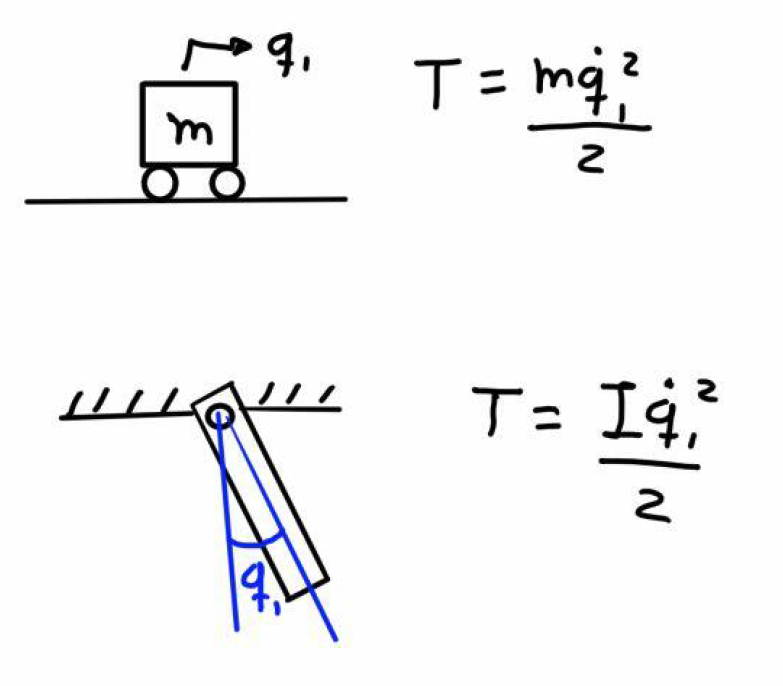

In [17]:
Image('figuras/fig2-2.png',width=300)

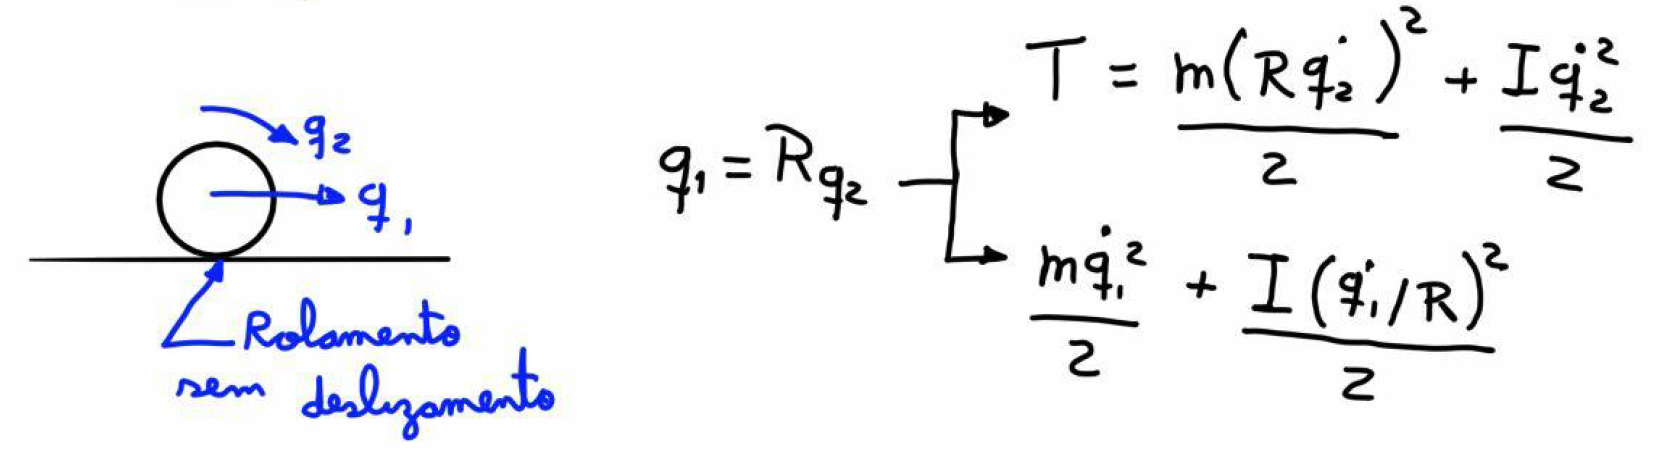

In [18]:
Image('figuras/fig2-3.png',width=500)

Energia Potencial $\rightarrow$ $U$


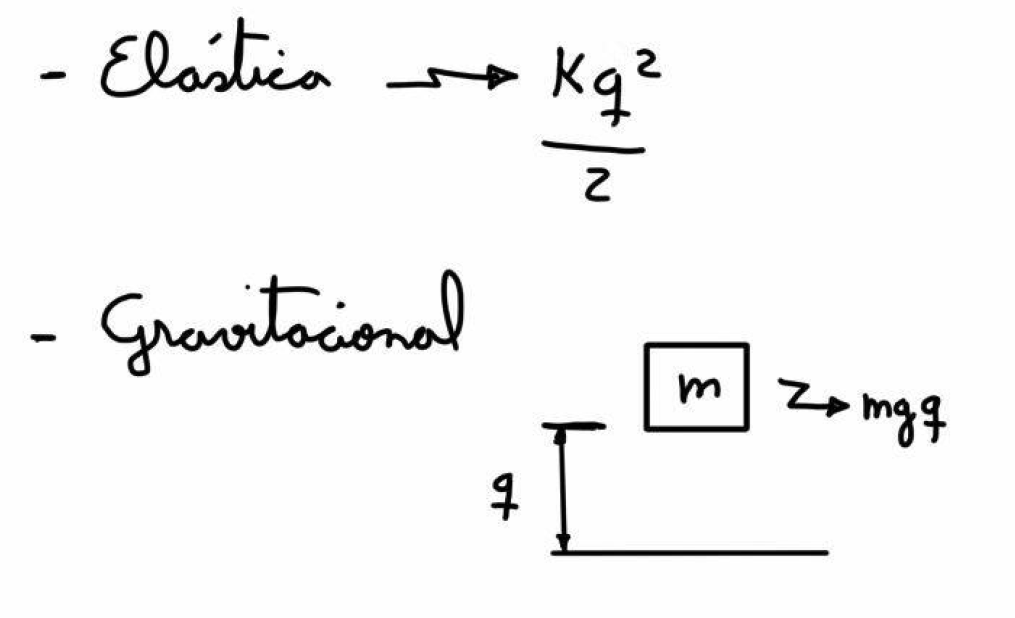

In [19]:
Image('figuras/fig2-4.png',width=300)

**Lagrangeano:**

$\mathscr{L} = T - U$

Equação de Lagrange para sistemas consevativos:

$\dfrac{d}{dt}\left( \dfrac{\partial \mathscr{L}}{\partial \dot{q}_i}\right) - \dfrac{\partial \mathscr{L}}{\partial q_i} = 0 \qquad i = 1,2,...,n$

### Exemplo 1:

Obtenha a frequência angular, $\omega_n$ do seguinte sistema mecânico e um gráfico do deslocamento em função do tempo para as seguintes condições iniciais: $\theta(0) = \pi/6$ e $\dot{\theta}(0) = 0$.

Dados: 

Raio = 0.2m

Massa do bloco = 0.5kg

Massa do disco = 0.5kg

Rigidez da mola = 1000N/m


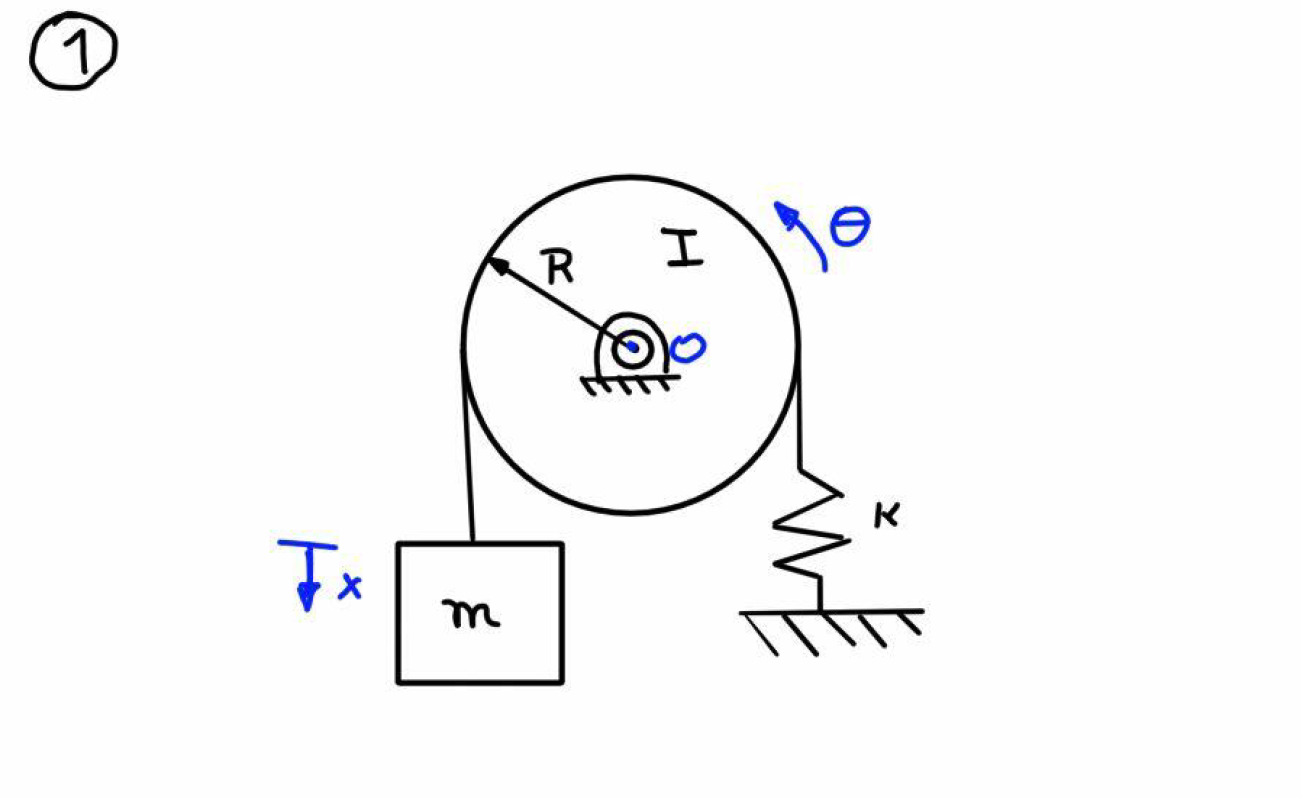

In [20]:
Image('figuras/fig2-5.png',width=600)

In [21]:
m,I,k,R = symbols('m I k R',positive = True)
t = symbols('t')
theta = Function('theta')(t)

Considerando que:

$x = R \theta$

In [22]:
T = m*(R*theta.diff(t))**2/2 + I*(theta.diff(t))**2/2
Eq(symbols('T'),T)

Eq(T, I*Derivative(theta(t), t)**2/2 + R**2*m*Derivative(theta(t), t)**2/2)

In [23]:
U = k*(R*theta)**2/2
Eq(symbols('U'),U)

Eq(U, R**2*k*theta(t)**2/2)

In [24]:
L = T - U
Eq(symbols('L'),L)

Eq(L, I*Derivative(theta(t), t)**2/2 - R**2*k*theta(t)**2/2 + R**2*m*Derivative(theta(t), t)**2/2)

In [25]:
EDM = Eq((L.diff(theta.diff(t))).diff(t) - L.diff(theta),0)
EDM

Eq(I*Derivative(theta(t), (t, 2)) + R**2*k*theta(t) + R**2*m*Derivative(theta(t), (t, 2)), 0)

In [26]:
Eq(theta.diff(t,2),solve(EDM,theta.diff(t,2))[0])

Eq(Derivative(theta(t), (t, 2)), -R**2*k*theta(t)/(I + R**2*m))

Logo, observa-se que:

$\omega_n = \sqrt{\frac{R^{2} k }{I + R^{2} m}}$

Resolvendo a EDO de segunda ordem: 

In [27]:
sol = dsolve(EDM)
dsolve(EDM)

Eq(theta(t), C1*sin(R*sqrt(k)*t/sqrt(I + R**2*m)) + C2*cos(R*sqrt(k)*t/sqrt(I + R**2*m)))

In [28]:
omega_n = symbols('omega_n')
sol.subs(R*sqrt(k/(I+R**2*m)),omega_n)

Eq(theta(t), C1*sin(omega_n*t) + C2*cos(omega_n*t))

Temos que: $\theta(0) = \pi/6$ e $\dot{\theta}(0) = 0$

In [29]:
CI_1 = Eq(pi/6,sol.rhs.subs(t,0))
CI_1

Eq(pi/6, C2)

In [30]:
sol = sol.subs('C2',pi/6)
sol

Eq(theta(t), C1*sin(R*sqrt(k)*t/sqrt(I + R**2*m)) + pi*cos(R*sqrt(k)*t/sqrt(I + R**2*m))/6)

In [31]:
CI_2 = Eq(0,sol.rhs.diff(t).subs(t,0))
CI_2

Eq(0, C1*R*sqrt(k)/sqrt(I + R**2*m))

In [32]:
sol = sol.subs('C1',0)
sol

Eq(theta(t), pi*cos(R*sqrt(k)*t/sqrt(I + R**2*m))/6)

In [33]:
dados = {R:0.2,m:0.5,I:0.5*0.2**2/2,k:1000}

In [34]:
theta_t = sol.rhs.subs(dados)
Eq(Function('theta')(t),theta_t)

Eq(theta(t), pi*cos(11.5470053837925*sqrt(10)*t)/6)

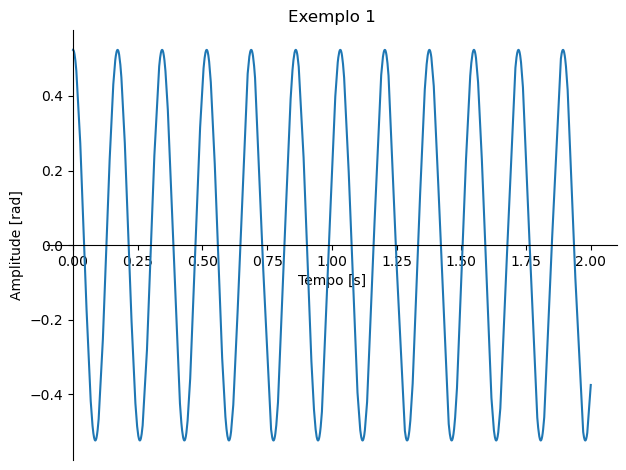

In [35]:
plt = plot(theta_t,(t,0,2),show=False)
plt.title = 'Exemplo 1'
plt.xlabel = 'Tempo [s]'
plt.ylabel = 'Amplitude [rad]'
plt.show()

## Massa Equivalente e Rigidez Equivalente

De modo geral, para todo sistema conservativo de 1 GDL em vibração livre podemos modelá-lo da seguinte maneira: 

$m_{eq} \ddot{q}_1 + k_{eq} q = 0$

No exemplo anterior obtivemos a seguinte equação de movimento: 

$(R^2m + I) \ddot{\theta} + R^2 k \theta = 0$

Deste modo, observa-se que:

$m_{eq} = R^2m + I$

$k_{eq} = R^2 k$ 

Observa-se que:

$\omega_n = \sqrt{\dfrac{k_{eq}}{m_{eq}}}$

### Exemplo 2:

Obtenha a frequência natural de um disco soldado a um eixo flexível engastado. Obtenha uma expressão para o deslocamento angular $\theta$ do disco em função do tempo, considere como codição inicial uma velocidade $\dot{\theta}(t) = \omega_0$. 

### Associação de Molas

* Em paralelo: 


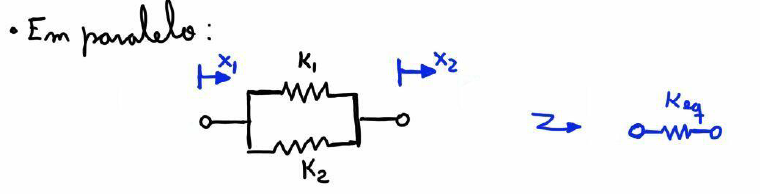

In [36]:
Image('figuras/fig2-6.png',width=500)

$F_{M_1} = - k_1 (x_1 - x_2)$

$F_{M_2} = - k_2 (x_1 - x_2) $

$F_M = F_{M_1} F_{M_2} \rightarrow F_M = k_1(x_2 - x_1) + k_2(x_2 - x_1)$

$F_M = (k_1 + k_2)(x_2 - x_1) \rightarrow F_M = k_{eq} (x_2 - x_1)$

$k_{eq} = k_1 + k_2$

Para $n$ molas:

$k_{eq} = \sum_{i=1}^{n}k_i$

* Em série

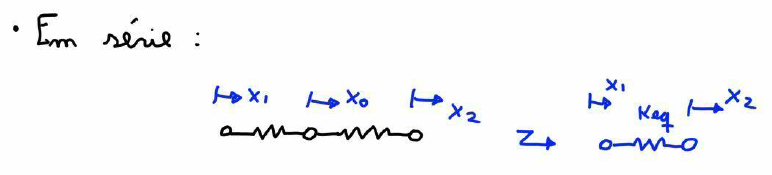

In [37]:
Image('figuras/fig2-7.png',width=500)

$F_{M_1} = -k_1(x_1 - x_0)$

$F_{M_2} + -k_2(x_0 - x_2)$

$F_{M_1} = F_{M_2} = F_M$

$F_M = -k_1(x_1 - x_0) \rightarrow x_0 = \dfrac{F_M}{k_1} + x_1$

$F_M = -k_2(x_o - x_2) \rightarrow x_o = \dfrac{-F_M}{k_2} + x_2$

$F_M = k_2(x_2 - \dfrac{F_M}{k_1} - x_1)$

$\dfrac{F_M}{k_2} = (x_2 - x_1) - \dfrac{F_M}{k_1} \rightarrow \dfrac{F_M}{k_2} + \dfrac{F_M}{k_1} = (x_2 - x_1)$

$F_M\left( \dfrac{1}{k_2} + \dfrac{1}{k_1} \right) = (x_2 - x_1) \rightarrow F_M = - \left( \dfrac{1}{k_1} + \dfrac{1}{k_2} \right)^{-1}(x_1 - x_2)$

$k_{eq} = \left(\dfrac{1}{k_1} + \dfrac{1}{k_2} \right)^{-1}$

Para $n$ molas:

$k_{eq} = \left( \sum^{n}_{i=1} \dfrac{1}{k_i} \right)^{-1}$

### Exemplo 3: 

Obtenha a rigidez equivalente do seguinte sistema: 


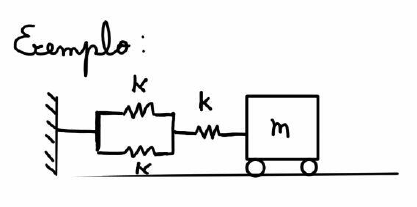

In [38]:
Image('figuras/fig2-8.png',width=500)

## Linearização em Torno de um Ponto de Equilíbrio

### Estabilidade

O conceito de estabilidade é fundamental no estudo de sistemas dinâmicos.

A estabilidade está associada a característica de uma dada solução do sistema e, intuitivamente, pode-se entendê-la pensando em termos de como o sistema responde a uma determinada pertubação. Se esta pertubação não afetar significamente um dada solução, então ela é estável. Do contrário, ela é instável. 

1. Equilíbrio meta-estável
2. Equilíbrio instável
3. Equilíbrio estável
4. Equilíbrio neutro

### Ponto de Equilíbrio

Define-se um ponto de equilíbrio, ou ponto fixo de um sistema dinâmico, como sendo o ponto em que o sistema permanece estacionário na medida em que o tempo evolui. 

* Um ponto de equilíbrio é um ponto onde a solução não varia com o tempo. 
* Pensando em termos mecânicos, um ponto de equilíbrio está associado a uma posição onde o sistema possui velocidade e acelerações nulas. 

$y = f(x)$

$\bar{x} \in \mathbb{R}^{n}$ é um ponto de equilíbrio

$x = \bar{x} + \eta$ , $\bar{x}$, $\eta \in \mathbb{R}^{n}$

Vamos expandir $f$ em torno de $\bar{x}$ usando uma série de Taylor:

$y = f(x) = f(\bar{x}) + \dfrac{df}{dx}(x - \bar{x}) + \dfrac{1}{2!} \dfrac{d^2 f}{dx^2}(x - \bar{x})^2 + ...$

Se $x - \bar{x}$ for pequeno, podemos desprezar os termos de ordem mais elevada:

$y = \bar{y} + K(x - \bar{x})$

onde:

$\bar{y} = f(\bar{x})$

$K = \left. \dfrac{df}{dx} \right|_{x = \bar{x}}$

### Exemplo 4:

Obtenha a frequência natural para um pêndulo de massa concentrada, conforme mostrado na figura a seguir. Considere pequenas oscilações para o ângulo $\theta$.  


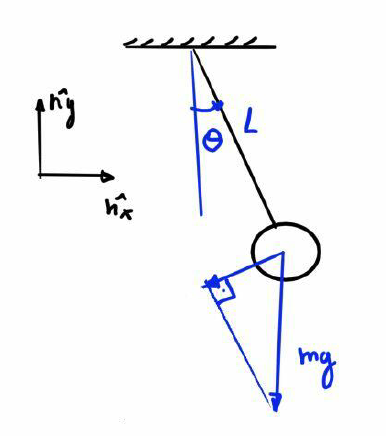

In [39]:
Image('figuras/fig2-9.png',width=400)

### Exemplo 5: 

Obtenha a equação de movimento linearizada para o seguinte sistema: 

$m \ddot{x} + k_0x - k_1 x^3 = 0$

**Recaptulando...**

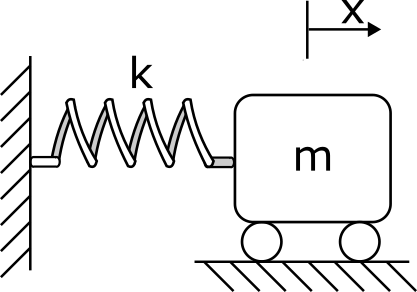

In [40]:
Image('figuras/fig2-10.png',width=400)

$x(t) = x_0 cos(\omega_n t) + \dfrac{v_0}{\omega_n} sen(\omega_n t)$

onde:

$\omega_n = \sqrt{\dfrac{k}{m}}$

Ou:

$x(t) = X_0 sen(\omega_n t + \phi)$

onde:

$X_0 = \sqrt{x_0^2 + \left( \dfrac{v_0}{\omega_n}\right)^2} \Leftarrow$ amplitude

$tg\phi = \dfrac{\omega_n x_0}{v_0} \Leftarrow$ ângulo de fase

A frequência natural do movimento não amortecido $f_n$ [Hz] e o período natural do movimento não amortecido $\tau_n$ [seg], são: 

$f_n = \dfrac{\omega_n}{2 \pi} = \dfrac{1}{2 \pi} \sqrt{\dfrac{k}{m}} = \dfrac{1}{\tau_n}$

Em muitos casos de sistemas massa-mola, quando a mola apresenta característica linear, é mais prático apoiar a massa sobre a mola e medir a deflexão estática da mola sob o peso da massa. 

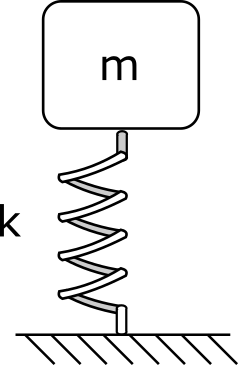

In [41]:
Image('figuras/fig2-11.png',width=250)

A deflexão estática assim obtida seria: 

$\delta_e = \dfrac{mg}{k}$

E a frequência natural não amortecida em termos da deflexão estática $\delta_e$ seria: 

$f_n = \dfrac{1}{2 \pi}\sqrt{\dfrac{g}{\delta_e}}$

onde $g$ é a aceleração da gravidade

## Sistemas com um Grau de Liberdade em Vibrações Livres com Amortecimento Viscoso

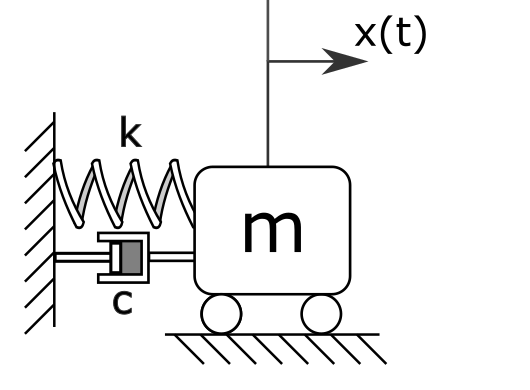

In [42]:
Image('figuras/fig2-12.png',width=600)

In [43]:
c = symbols('c',positive = True)

A equação de movimento do sistema é dada por:

In [44]:
EQM = Eq(m*x.diff(t,2) + c*x.diff(t) + k*x,0)
EQM

Eq(c*Derivative(x(t), t) + k*x(t) + m*Derivative(x(t), (t, 2)), 0)

Resolvendo esta EDO:

In [45]:
sol = dsolve(EQM)
sol

Eq(x(t), C1*exp(t*(-c + sqrt(c**2 - 4*k*m))/(2*m)) + C2*exp(-t*(c + sqrt(c**2 - 4*k*m))/(2*m)))

O comportamento da solução dependerá dos valores do $\Delta$:

$\Delta = c^2 - 4km$

Denominaremos **coeficiente de amortecimento crítico** $c_c$ o valor limítrofe do coeficiente de amortecimento viscoso que anule $\Delta$.

* para $\Delta = 0 \Rightarrow c_c = \sqrt{4km} = 2m\sqrt{\dfrac{k}{m}}$

Expressando em termos da pulsação natural não amortecida:

$c_c = 2 m \omega_n$

Em engenharia, sempre que possível, é vantajoso realizar análises em termos de parâmetros adimensionais. 

**Fator de Amortecimento**

$\zeta = \dfrac{c}{c_c}$

$\zeta = \dfrac{c}{2m \omega_n}$

Escrevendo a equação de movimento na forma adimensionalizada: 

In [46]:
zeta,omega_n = symbols('zeta omega_n',positive = True)

In [47]:
EQM = Eq(x.diff(t,2) + 2*zeta*omega_n*x.diff(t) + omega_n*x,0)
EQM

Eq(2*omega_n*zeta*Derivative(x(t), t) + omega_n*x(t) + Derivative(x(t), (t, 2)), 0)

Resolvendo a EDO:

In [48]:
sol2 = dsolve(EQM)
sol2

Eq(x(t), C1*exp(t*(sqrt(omega_n)*sqrt(omega_n*zeta**2 - 1) - omega_n*zeta)) + C2*exp(-t*(sqrt(omega_n)*sqrt(omega_n*zeta**2 - 1) + omega_n*zeta)))

Observe que:

$s_{1,2} = \omega_n(-\zeta \pm \sqrt{\zeta^2 -1})$

O sistema poderá se comportar de três formas distintas dependendo do valor do fator de amortecimento:

* Amortecimento Hipercrítico $\zeta > 1$
* Amortecimento Crítico $\zeta =1$
* Amortecimento subcrítico $\zeta < 1$

In [49]:
sol3 = dsolve(EQM,ics={x.subs(t,0):x0,x.diff(t).subs(t,0):v0})

In [50]:
# Por exemplo, vamos considerar as seguintes condições iniciais:
xo = 1
vo = -4.5
# Vamos considerar a seguinte frequência natural: 
wn = 3

In [51]:
sol3 = sol3.subs({x0:xo,v0:vo,omega_n:wn})

In [52]:
def x_plot(zeta_val):
    plt_s = plot(sol3.rhs.subs(zeta,zeta_val).evalf(),(t,0,10),show=False)
    plt_s.title = 'Influência do Fator de Amortecimento'
    plt_s.xlabel = 'Tempo [s]'
    plt_s.ylabel = 'Amplitude'
    plt_s.show()

In [53]:
from ipywidgets import interact

ModuleNotFoundError: No module named 'ipywidgets'

In [ ]:
interact(x_plot,zeta_val=(0.01,2))

### Amortecimento Hipercrítico $\zeta > 1$

$s_{1,2} =  \left( - \zeta \pm \sqrt{\zeta^2 -1} \right) \Leftarrow$ real

$x(t) = C_1 e^{\left(-\zeta + \sqrt{\zeta^2 -1}\right) \omega_n t} + C_2 e^{\left(-\zeta - \sqrt{\zeta^2 -1}\right)\omega_n t}$

Onde:

$C_1 = \dfrac{\dfrac{v_0}{x_0} + \left( \zeta + \sqrt{\zeta^2 -1} \right)x_0}{2\sqrt{\zeta^2 -1}}$

$C_2 = \dfrac{\dfrac{v_0}{x_0} + \left( \zeta - \sqrt{\zeta^2 -1} \right)x_0}{2\sqrt{\zeta^2 -1}}$

### Amortecimento Crítico $\zeta =1$

$s_1 = s_2 = -\omega_n$

$x(t) = (C_1 + C_2t) e^{-\omega_n t}$

$x(t) = \left[ x_0 + \left( \dfrac{v_0}{\omega_n + x_0} \right) \omega_n t \right] e^{-\omega_n t}$

Condição para que ocorra o cruzamento do eixo das abscissas:

$x_0 + \left( \dfrac{v_0}{\omega_n} + x_0 \right) - \omega_n t^* = 0 \Rightarrow \omega_n t^* = -\dfrac{1}{1 + \dfrac{v_0}{\omega_n x_0}} \Rightarrow \dfrac{v_0}{\omega_n x_0} < -1 $

logo $\left| \dfrac{v_0}{\omega_n} \right| > |x_0|$ e $v_0$ e $x_0$ devem ter sinais opostos.

Observação:

* Em ambos os casos o movimento é não-oscilatório
* Para uma dada condição inicial, o retorno mais rápido à configuração de equilíbrio sem oscilações é obtido quando $\zeta = 1$

### Amortecimento subcrítico $\zeta < 1$

Neste caso os autovalores são complexos conjugados

$s_{1,2} = \omega_n \left(- \zeta \pm i \sqrt{1 - \zeta^2} \right)$

$x(t) = e^{-\zeta \omega_n t} \left( A e ^{i\sqrt{1 - \zeta^2}\omega_n t} + B e^{-i \sqrt{1 - \zeta^2}\omega_n t} \right)$

lembrando da relação de Euler $\rightarrow e^{\pm i \theta} = cos \theta \pm i sen \theta$ 

$x(t) = e^{-\zeta \omega_n t} \left[ A cos \left( \sqrt{1 - \zeta^2}\omega_n t \right) + i A sen \left( \sqrt{1 - \zeta^2} \omega_n t \right) + B cos \left( \sqrt{1 - \zeta^2} \omega_n t \right) - i B sen \left( \sqrt{1 - \zeta^2} \omega_n t \right)\right]$ 

definindo $C_1 = (A+B)$ e $C_2 = i(A-B)$

$x(t) = e^{-\zeta \omega_n t} \left[ C_1 cos\left(\sqrt{1 - \zeta^2} \omega_n t\right) + C_2 sen \left( \sqrt{1 - \zeta^2}\omega_n t \right) \right]$

$x(t) = e^{-\zeta \omega_n t} \left[ x_0 cos \left( \sqrt{1 - \zeta^2} \omega_n t \right) + \dfrac{v_0 + \zeta \omega_n x_0}{\sqrt{1-\zeta^2}\omega_n} sen \left( \sqrt{1 - \zeta^2} \omega_n t \right)\right]$

De forma mais compacta:

$x(t) = X_1 e ^{-\zeta \omega_n t} sen \left( \sqrt{1 - \zeta^2} \omega_n t + \phi \right)$

$X_1 = \sqrt{x_0^2 + \left(\dfrac{\dfrac{v_0}{\omega_n} + \zeta x_0}{\sqrt{1 - \zeta^2}} \right)^2}$

$tg\phi = \dfrac{\sqrt{1 - \zeta^2}x_0}{\dfrac{v_0}{\omega_n} + \zeta x_0}$

Definições:

$\omega_a = \sqrt{1 - \zeta^2} \omega_n \Leftarrow$ pulsação natural amortecida

$f_a = \dfrac{\sqrt{1 - \zeta^2}\omega_n}{2 \pi} \Leftarrow$ frequência natural amortecida

$\tau_a = \dfrac{2 \pi}{\sqrt{1 - \tau^2}\omega_n} \Leftarrow$ período natural amortecido

### Equações de Lagrange para Sistemas Dissipativos

$\dfrac{d}{dt}\left( \dfrac{\partial \mathscr{L}}{\partial \dot{q}_i} \right) - \dfrac{ \partial \mathscr{L}}{\partial q_i} + \dfrac{\partial D}{\partial \dot{q}_1} = 0 \qquad i = 1,2,...,n$

Onde:

$D = \dfrac{c_{eq} \dot{q}^2_i}{2}$

## Decremento Logarítimico

$\rightarrow$ Procedimento experimental para determinar o fator de amortecimento subcrítico. 

In [ ]:
Image('figuras/fig2-13.png',width=600)

$x_j$ e $x_{j+1}$ são duas oscilações consecutivas.

$\rightarrow$ o decremento logarítimico $\delta$ é definido como o logarítimo neperiano da razão entre duas amplitudes consecutivas. 

$\delta = ln \left(\dfrac{x_j}{x_{j+1}}\right)$

logo:

$\delta =  ln \left[ \dfrac{e^{-\zeta \omega_n t}}{e^{-\zeta \omega_n (t + \tau_a)}} \right]  = \zeta \omega_n \tau_a$

lembrando que:

$\tau_a = \dfrac{2 \pi}{\sqrt{1 - \zeta^2}\omega_n}$

substituindo:

$\delta = \dfrac{2 \pi \zeta}{\sqrt{1 - \zeta^2}} \rightarrow \zeta = \dfrac{1}{\sqrt{1 + \left(\dfrac{2 \pi}{\delta} \right)^2}}$

obs.: se $x_j \approx x{j+1}$

$r \zeta \omega_n \tau_a = r \delta $

$r \delta =  ln \left( \dfrac{x_j}{x_{j+r}} \right)$

se $\zeta <<1 \rightarrow \delta \approx 2 \pi \zeta$

### Amortecimento de Coulomb

In [ ]:
Image('figuras/fig2-14.png',width=400)

$m \ddot{x} = - F_a - k x $

$m \ddot{x} + F_a + kx = 0$

$F_a = \mu m g \dfrac{ \dot{x}}{| \dot{x} |}$

Consideremos o meio ciclo de deslocamento da massa entre o ponto de delsocamento máximo $x_{-j}$ do lado negativo de $x(t)$ e o ponto do deslocamento máximo $x_{+j}$ do lado positivo de $x(t)$.

A energia cinética nesses dois pontos é nula. 


In [ ]:
Image('figuras/fig2-15.png',width=600)

$\Delta U^{k} = \dfrac{1}{2} k (x_{+j}^2 - x_{-j}^2) = -\dfrac{1}{2} k \left[(x_{+j} + x_{-j}).(x_{-j} - x_{+j}) \right]$

Tendo em vista que a variação da energia cinética é nula, temos que a variação da energia elástica é igual à energia dissipado pelo atrito: 

$\Delta E^{a} = - \mu m g (x_{+j} + x_{-j})$

logo: 

$x_{-j} - x_{+j} = \dfrac{2 \mu m g}{k} = constante$

$\rightarrow$ A partir do instante em que a força restauradora da mola for menor que a força de atrito, cessa o movimento oscilatório e a massa permanece estacionária, deslocada de uma distância $\Delta$ da posição de comprimento livre da mola.

$\Delta = \dfrac{\mu m g}{k}$

Sob o ponto de vista prático, as características do amortecimento de atrito seco são: 

* movimento oscilatório com frequência natural igual a frequência do sistema não-amortecido
* amplitude do movimento oscilatório decrescendo linearmente com o tempo
* deslocamento estático residual ao fim do movimento oscilatório

## Associação de Amortecedores

* Amortecedores em paralelo

In [ ]:
Image('figuras/fig2-16.png',width=300)

$F = c_1(\dot{y} - \dot{x}) + c_2( \dot{y} - \dot{x}) = (c_1 + c_2)(\dot{y} - \dot{x})$

$F = c_{eq}(\dot{y} - \dot{x}) \rightarrow c_{eq} = c_1 + c_2$

* Amortecedores em série

In [ ]:
Image('figuras/fig2-17.png',width=300)

$F = c_1(\dot{z} - \dot{x}) = c_2(\dot{y} - \dot{z}) \rightarrow (c_1 + c_2)\dot{z} = c_2 \dot{y} + c_1 \dot{x}$

$\dot{z} = \dfrac{c_2 \dot{y} + c_1 \dot{x}}{c1 + c2} \rightarrow F = c_{eq}(\dot{y} - \dot{x})$

$F = c_2(\dot{y} - \dot{z}) = c_2 \left[ \dot{y} - \dfrac{c_2 \dot{y} + c_1 \dot{x}}{c_1 + c_2} \right] = \dfrac{c_1 c_2}{c_1 + c_2}(\dot{y} - \dot{x})$

$c_{eq} = \left( \dfrac{1}{c_1} + \dfrac{1}{c_2} \right)^{-1}$

## Integração Numérica

Atualmente, muitos problemas de vibrações mecânicas podem ser resolvidos de modo mais rápido e prático através de técnicas de integração numérica. No entanto, observa-se que na resolução por integração numérica sempre se terá um erro associado.

Os métodos de Runge-Kutta são, possivelmente os métodos de integração mais populares por aliar simplicidade e precisão. Esses métodos são usualmente classificados segundo a ordem de precisão associada a eles. 

O método de quarta ordem considera erros associados à quarta potência do passo de integração. A derivada é aproximada, conforme mostrado a seguir:

$X_{n+1} = X_n + \dfrac{1}{6} \Delta t (k_1 + 2k_2 + 2 K_3 + k_4)$

onde:

$k_1 = g(X_n,tn)$

$K_2 = g(X_n + \dfrac{k1}{2}, t_n + \dfrac{\Delta t}{2} )$

$k_3 = g(X_n, + \dfrac{k_2}{2}, t_n + \dfrac{\Delta t}{2}$

$k_4 = g(X_n + k_3, t_n + \Delta t)$

Runge-Kutta de 4ª ordem implementado em Python:

Sistema: $\ddot{x} + 2 \zeta \omega_n \dot{x} + \omega_n^2 x = 0$

Onde:

$\zeta = 0.1$

$\omega_n = 10$

$\dot{x}(0) = 5m/s$

$x(0) = 0m$

In [ ]:
#Vibrações Mecânicas
#Professor Paulo Victor
#Runge Kutta de 4a Ordem programado em Python3


import numpy as np
import matplotlib.pyplot as plt

#Conduções iniciais:

xn=0 # Desclocamento inicial em metros
vn=5 # Velocidade inicial em m/s

#Parâmetros

tn=0 # Tempo inicial
tf= 5 # Tempo final
h=0.001  # Passo de integração
n=int(tf/h)  # Número de pontos 
zeta_n=0.1# Constante de amortecimento divido pelo amortecimento crítico 
wn=10 # Frequência natural

X=np.zeros(n)
V=np.zeros(n)
T=np.zeros(n)
F=np.zeros(n)

X[0]=xn
V[0]=vn
T[0]=tn

# Definição de funções

# dv/dt = -2*xi*wn*v(t) - wx**2*x(t)
def vp(tt,xt,vt):
    return -2*zeta_n*wn*vt - wn**2*xt

# dx/dt = v(t)
def xp(tt,xt,vt):
    return vt

# Integração Numérica
for i in range(1,n):
    
    k1=xp(tn,xn,vn)
    q1=vp(tn,xn,vn)
    
    k2=xp(tn+h/2,xn+h*k1/2,vn+h*q1/2)
    q2=vp(tn+h/2,xn+h*k1/2,vn+h*q1/2)
    
    k3=xp(tn+h/2,xn+h*k2/2,vn+h*q2/2)
    q3=vp(tn+h/2,xn+h*k2/2,vn+h*q2/2)
    
    k4=xp(tn+h,xn+h*k3,vn+h*q3)
    q4=vp(tn+h,xn+h*k3,vn+h*q3)
    
    tn=tn+h
    xn=xn+(h/6)*(k1+2*k2+2*k3+k4)
    vn=vn+(h/6)*(q1+2*q2+2*q3+q4)
    
    X[i]=xn
    V[i]=vn
    T[i]=tn

# Plotar Gráfico
    
plt.figure()
plt.plot(T,X)
plt.title('Massa-Mola-Amortecedor')
plt.xlabel('Tempo[s]')
plt.ylabel('Amplitude[m]')
plt.grid(True)
plt.show()

Ou, fazendo de outro modo:

In [ ]:
def Sistema(X,t): # Criar uma função para o sistema -> X = [x(t),v(t)]
    xt = X[0]
    vt = X[1]
    return [vt,-2*zeta_n*wn*vt - wn**2*xt]

from scipy.integrate import odeint

X0 = [0,5] # Condições Iniciais

X = odeint(Sistema,X0,T)


# Plotar Gráfico
    
plt.figure()
plt.plot(T,X[:,0])
plt.title('Massa-Mola-Amortecedor')
plt.xlabel('Tempo[s]')
plt.ylabel('Amplitude[m]')
plt.grid(True)
plt.show(3,0)   

## Espaço de Fase

Um sistema dinâmico é descrito por uma equação diferencial que define uma evolução quadro a quadro da realidade. Portanto, um sistema dinâmico pode ser entendido como a evolução das **variáveis de estado** do sistema, $\vec{X}$, que é continuamente transformado por uma função $g$. Deste modo:

$\dot{\vec{X}} = g(\vec{X},t)$

O **espaço de fase** (ou **espaço de estado**) de um sistema é definido como o espaço formado pelas variáves de estado do sistema. 

In [ ]:
plt.figure()
plt.plot(X[:,1],X[:,0])
plt.title('Espaço de Fase')
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$\dot{x}(t)$')
plt.grid(True)
plt.show() 

[Avançar para o próximo capítulo](Vibs3.ipynb)

[Voltar para o menu inicial](LEIAME.ipynb)